In [2]:
import sympy as sp
sp.init_printing()
m=sp.symbols('m') #mass of the ball
eta=sp.symbols('eta') #Viscosity of liquid
raw=sp.symbols('rho') #Density of liquid
g=sp.symbols('g') #Gravitational acceleration
R=sp.symbols('R') #ball's Radius
pi=sp.symbols('pi') #pi
F=sp.symbols('F') #total Force of the ball
t=sp.var('t')
x=sp.Function('x') #place
v=sp.Function('v') #Velocity
a=sp.Function('a') #Acceleration
F_of_the_ball_1=sp.Eq(F,m*g-g*4*pi*R**3*raw/3-6*pi*eta*R*v(t))
F_of_the_ball_2=F_of_the_ball_1.subs(F,m*a(t))
F_of_the_ball_2

In [0]:
sp.init_printing()
m=sp.symbols('m') #mass of the ball
eta=sp.symbols('eta') #Viscosity of liquid
raw=sp.symbols('rho') #Density of liquid
g=sp.symbols('g') #Gravitational acceleration
R=sp.symbols('R') #ball's Radius
pi=sp.symbols('pi') #pi
F=sp.symbols('F') #total Force of the ball
t=sp.var('t')
x=sp.Function('x') #place
v=sp.Function('v') #Velocity
a=sp.Function('a') #Acceleration
F_of_the_ball_1=sp.Eq(F,m*g-g*4*pi*R**3*raw/3-6*pi*eta*R*v(t))
F_of_the_ball_2=F_of_the_ball_1.subs(F,m*a(t))
F_of_the_ball_3=sp.Eq(a(t),g-(4*g*pi*R**3*raw/3)/m-(6*pi*eta*R*v(t))/m)
F_of_the_ball_4=F_of_the_ball_3.subs([(a(t),v(t).diff())])
m_1=2.04/1000 #mass of the ball
g_1=9.823 #Gravitational acceleration
R_1=0.005 #ball's Radius
density_of_liquid=1000
pi_1=math.pi #pi
F_of_the_ball_v_1=F_of_the_ball_4.subs([(g,g_1),(m,m_1),(R,R_1),(pi,pi_1)])
raw_1=density_of_liquid
F_of_the_ball_v_1_2=F_of_the_ball_v_1.subs([(raw,raw_1)])
F_of_the_ball_v_1_2

In [7]:
F_show=sp.Eq(v(t).diff(),-46.20*eta*v(t)+7.302)
F_show

1.6

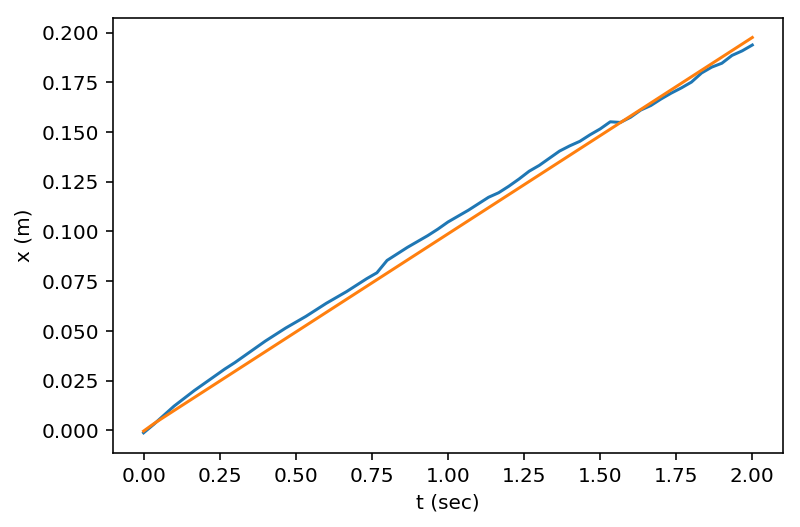

In [1]:
import sympy, math, csv
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
x_list_example_real=np.array([-0.001309,0.002946,0.007528,0.012111,0.016039,0.019967,0.023567,0.027168,0.030769,0.034042,0.037642,0.041243,0.044844,0.048117,0.05139,0.054336,0.057282,0.060555,0.063828,0.066774,0.06972,0.072994,0.076267,0.079213,0.085432,0.088705,0.091978,0.094924,0.09787,0.101143,0.104744,0.10769,0.110636,0.113909,0.117182,0.119474,0.122747,0.126348,0.130275,0.133221,0.136822,0.140423,0.143041,0.145332,0.148606,0.151552,0.155152,0.154825,0.157443,0.161044,0.163335,0.166609,0.169554,0.172173,0.175119,0.179702,0.182647,0.184611,0.188539,0.190831,0.193777])
def find_Viscosity(x_list_real,density_of_liquid):
    m=sp.symbols('m') #mass of the ball
    eta=sp.symbols('eta') #Viscosity of liquid
    raw=sp.symbols('rho') #Density of liquid
    g=sp.symbols('g') #Gravitational acceleration
    R=sp.symbols('R') #ball's Radius
    pi=sp.symbols('pi') #pi
    F=sp.symbols('F') #total Force of the ball
    t=sp.var('t')
    x=sp.Function('x') #place
    v=sp.Function('v') #Velocity
    a=sp.Function('a') #Acceleration
    F_of_the_ball_1=sp.Eq(F,m*g-g*4*pi*R**3*raw/3-6*pi*eta*R*v(t))
    F_of_the_ball_2=F_of_the_ball_1.subs(F,m*a(t))
    F_of_the_ball_3=sp.Eq(a(t),g-(4*g*pi*R**3*raw/3)/m-(6*pi*eta*R*v(t))/m)
    F_of_the_ball_4=F_of_the_ball_3.subs([(a(t),v(t).diff())])
    m_1=2.04/1000 #mass of the ball
    g_1=9.823 #Gravitational acceleration
    R_1=0.005 #ball's Radius
    pi_1=math.pi #pi
    F_of_the_ball_v_1=F_of_the_ball_4.subs([(g,g_1),(m,m_1),(R,R_1),(pi,pi_1)])
    raw_1=density_of_liquid
    F_of_the_ball_v_1_2=F_of_the_ball_v_1.subs([(raw,raw_1)])
    
    
    
    min_error=1000
    min_eta=-1
    x_list_min=[]
    for eta_1 in np.arange(1.4,1.8,0.05):
        v0 = 0.1303
        x0 = 0
        F_of_the_ball_v_1_3 = F_of_the_ball_v_1_2.subs([(eta,eta_1)])
        F_of_the_ball_v_solve_1 = sp.dsolve(F_of_the_ball_v_1_3,v(t))
        c1_solved = sp.solve(F_of_the_ball_v_solve_1.subs([(v(t),v0),(t,0)]),'C1')
        c1_solved = c1_solved[0]
        F_of_the_ball_v_solve_2 = F_of_the_ball_v_solve_1.subs('C1',c1_solved)
        c2 = sp.symbols('C2')
        F_of_the_ball_x_1 = sp.integrate(F_of_the_ball_v_solve_2.rhs,t)+c2
        F_of_the_ball_x = F_of_the_ball_x_1.subs(c2,x0)
        x_list = []
        n = len(x_list_real)
        t_list = np.arange(0,n*(1/30),1/30)
        for i in t_list:
            x_list = np.append(x_list,[F_of_the_ball_x.subs([(t,i)])])
        error = (1/(2*n)) * sum((x_list - x_list_real)**2)
        if error < min_error:
            min_error = error
            min_eta = eta_1
            x_list_min = x_list
    plt.plot(t_list,x_list_real ,)
    plt.plot(t_list,x_list_min ,)
    plt.xlabel("t (sec)")
    plt.ylabel('x (m)')
    return(min_eta)

find_Viscosity(x_list_example_real,1000)

In [2]:
import sympy, math, csv
import sympy as sp
import numpy as np

def find_Viscosity(x_list_real,density_of_liquid):
    m=sp.symbols('m') #mass of the ball
    eta=sp.symbols('eta') #Viscosity of liquid
    raw=sp.symbols('rho') #Density of liquid
    g=sp.symbols('g') #Gravitational acceleration
    R=sp.symbols('R') #ball's Radius
    pi=sp.symbols('pi') #pi
    F=sp.symbols('F') #total Force of the ball
    t=sp.var('t')
    x=sp.Function('x') #place
    v=sp.Function('v') #Velocity
    a=sp.Function('a') #Acceleration
    F_of_the_ball_1=sp.Eq(F,m*g-g*4*pi*R**3*raw/3-6*pi*eta*R*v(t))
    F_of_the_ball_2=F_of_the_ball_1.subs(F,m*a(t))
    F_of_the_ball_3=sp.Eq(a(t),g-(4*g*pi*R**3*raw/3)/m-(6*pi*eta*R*v(t))/m)
    F_of_the_ball_4=F_of_the_ball_3.subs([(a(t),v(t).diff())])
    m_1=2.04/1000 #mass of the ball
    g_1=9.823 #Gravitational acceleration
    R_1=0.005 #ball's Radius
    pi_1=math.pi #pi
    F_of_the_ball_v_1=F_of_the_ball_4.subs([(g,g_1),(m,m_1),(R,R_1),(pi,pi_1)])
    raw_1=density_of_liquid
    F_of_the_ball_v_1_2=F_of_the_ball_v_1.subs([(raw,raw_1)])
    min_error=1000
    min_eta=-1
    x_list_min=[]
    
    for eta_1 in np.arange(2.2,2.6,0.05):
        v0 = 0.1303
        x0 = 0
        F_of_the_ball_v_1_3 = F_of_the_ball_v_1_2.subs([(eta,eta_1)])
        F_of_the_ball_v_solve_1 = sp.dsolve(F_of_the_ball_v_1_3,v(t))
        c1_solved = sp.solve(F_of_the_ball_v_solve_1.subs([(v(t),v0),(t,0)]),'C1')
        c1_solved = c1_solved[0]
        F_of_the_ball_v_solve_2 = F_of_the_ball_v_solve_1.subs('C1',c1_solved)
        c2 = sp.symbols('C2')
        F_of_the_ball_x_1 = sp.integrate(F_of_the_ball_v_solve_2.rhs,t)+c2
        F_of_the_ball_x = F_of_the_ball_x_1.subs(c2,x0)
        x_list = []
        n = len(x_list_real)
        t_list = np.arange(0,n*(1/30),1/30)
        for i in t_list:
            x_list = np.append(x_list,[F_of_the_ball_x.subs([(t,i)])])
        error = (1/(2*n)) * sum((x_list - x_list_real)**2) #michali what is this?? ####:::####
        if error < min_error:
            min_error = error
            min_eta = eta_1
            x_list_min = x_list
    return(min_eta)

find_Viscosity(x_list_real,1000)

#this part of the code check each experiment result sheet
files_num = 11 #weve got 11 sheets
files_names = []

for i in range (1,files_num + 1):
    file_name = "Experiments - Experiment " + str(i) + ".csv"
    files_names.append(file_name)
    file_name = None
    
for sheet in files_names:
    sheet_rows = []
    with open(sheet, newline='') as f:
        sheet = csv.reader(f)
        for row in sheet:
            sheet_rows.append(row)
        #print(sheet_rows)

        rows_num = len(sheet_rows)
        sheet_x_positions_list = []
        
        for row in sheet_rows:#the first and the second rows are useless
            posi_x = row[1]
            sheet_x_positions_list.append(posi_x)
            find_Viscosity(sheet_x_positions_list,1000) #calculate each posi_x from sheets

            
        print("test",sheet_x_positions_list)
        

###

sample_row = [['VideoAnalysis: Time (s)', 'VideoAnalysis: X (m)', 'VideoAnalysis: Y (m)', 'VideoAnalysis: X Velocity (m/s)', 'VideoAnalysis: Y Velocity (m/s)', 'Time'], ['2.8', '0.003077', '-0.001709', '0.05584', '-0.05527', '0'], ['2.833333', '0.004103', '-0.004444', '0.083902', '-0.024644', '0.033333'], ['2.866667', '0.008205', '-0.004103', '0.107007', '0.00359', '0.066667'], ['2.9', '0.011966', '-0.003077', '0.111679', '0.003989', '0.1'], ['2.933333', '0.015726', '-0.003419', '0.113389', '-0.006838', '0.133333'], ['2.966667', '0.019487', '-0.004103', '0.114244', '-0.005413', '0.166667'], ['3', '0.023248', '-0.004103', '0.117092', '0.005413', '0.2000003333'], ['3.033333', '0.02735', '-0.003419', '0.117947', '0.009686', '0.2333336667'], ['3.066667', '0.031453', '-0.003419', '0.1094', '0.012251', '0.266667'], ['3.1', '0.034529', '-0.002735', '0.103417', '0.016524', '0.3000003333'], ['3.133333', '0.03829', '-0.002051', '0.099429', '0.01396', '0.3333336667'], ['3.166667', '0.041025', '-0.001709', '0.099429', '0.009117', '0.366667'], ['3.2', '0.044786', '-0.001709', '0.102563', '0.010541', '0.4000003333'], ['3.233333', '0.048204', '-0.001026', '0.09715', '0.012535', '0.4333336667'], ['3.266667', '0.051281', '-0.000684', '0.092022', '0.009686', '0.466667'], ['3.3', '0.054016', '-0.000342', '0.094871', '0.005413', '0.5000003333'], ['3.333333', '0.057435', '-0.000342', '0.101993', '0.001424', '0.5333336667'], ['3.366667', '0.061196', '-0.000342', '0.099999', '0.00057', '0.566667'], ['3.4', '0.064273', '-0.000342', '0.093446', '0.00114', '0.6000003333'], ['3.433333', '0.067008', '-0.000342', '0.096865', '0.003419', '0.6333336667'], ['3.466667', '0.070768', '0', '0.099144', '0.002564', '0.666667'], ['3.5', '0.073845', '0', '0.09658', '-0.002564', '0.7000003333'], ['3.533333', '0.077264', '-0.000342', '0.094871', '-0.003989', '0.7333336667'], ['3.566667', '0.079657', '-0.000342', '0.106551', '-0.003989', '0.766667'], ['3.6', '0.08376', '-0.000342', '0.132477', '-0.010256', '0.8000003333'], ['3.633333', '0.089571', '-0.001026', '0.129913', '-0.015954', '0.8333336667'], ['3.666667', '0.09299', '-0.001709', '0.11111', '-0.014245', '0.866667'], ['3.7', '0.096409', '-0.002051', '0.104272', '-0.009686', '0.9000003333'], ['3.733333', '0.099828', '-0.002051', '0.100853', '-0.012251', '0.9333336667'], ['3.766667', '0.103247', '-0.003077', '0.096295', '-0.010256', '0.966667'], ['3.8', '0.106323', '-0.002735', '0.090027', '-0.009117', '1.000000333'], ['3.833333', '0.109058', '-0.003419', '0.089173', '-0.01453', '1.033333667'], ['3.866667', '0.112135', '-0.003761', '0.092306', '-0.018518', '1.066667'], ['3.9', '0.115212', '-0.004786', '0.095725', '-0.019373', '1.100000333'], ['3.933333', '0.118631', '-0.005128', '0.09601', '-0.017379', '1.133333667'], ['3.966667', '0.121708', '-0.005812', '0.093161', '-0.018803', '1.166667'], ['4', '0.124785', '-0.006496', '0.091167', '-0.017094', '1.200000333'], ['4.033333', '0.127862', '-0.006838', '0.088318', '-0.018233', '1.233333667'], ['4.066667', '0.130597', '-0.007863', '0.086893', '-0.015384', '1.266667'], ['4.1', '0.133332', '-0.007863', '0.092022', '-0.013105', '1.300000333'], ['4.133333', '0.137434', '-0.008547', '0.079771', '-0.016524', '1.333333667'], ['4.166667', '0.138802', '-0.008889', '0.064387', '-0.021652', '1.366667'], ['4.2', '0.140853', '-0.009914', '0.071224', '-0.027635', '1.400000333'], ['4.233333', '0.143588', '-0.011282', '0.079201', '-0.019373', '1.433333667'], ['4.266667', '0.146323', '-0.011282', '0.084044', '-0.009686', '1.466667'], ['4.3', '0.149058', '-0.011282', '0.090027', '-0.016809', '1.500000333'], ['4.333333', '0.152477', '-0.012308', '0.091452', '-0.02678', '1.533333667'], ['4.366667', '0.155554', '-0.013333', '0.083076', '-0.029914', '1.566667'], ['4.4', '0.157605', '-0.014701', '0.084472', '-0.022507', '1.600000333'], ['4.433333', '0.161024', '-0.014701', '0.092876', '-0.010826', '1.633333667'], ['', '', '', '', '', '1.666667'], ['', '', '', '', '', '1.700000333'], ['', '', '', '', '', '1.733333667'], ['', '', '', '', '', '1.766667'], ['', '', '', '', '', '1.800000333'], ['', '', '', '', '', '1.833333667'], ['', '', '', '', '', '1.866667'], ['', '', '', '', '', '1.900000333'], ['', '', '', '', '', '1.933333667'], ['', '', '', '', '', '1.966667'], ['', '', '', '', '', '2.000000333']]
print(sample_row)



NameError: name 'x_list_real' is not defined